# Plotting with python

The main plotting module in python is `matplotlib`.  There is a lot
that can be done with it - see the [webpage](https://matplotlib.org/gallery/index.html)


## Contents

* [Running inside a notebook](#inside-notebook)
 * [2D plots](#2D-plots)
 * [Histograms and Bar Plots](#histograms)
 * [Scatter plots](#scatter-plots)
 * [Subplots](#subplots)
 * [Displaying Images](#displaying-images)
 * [3D plots](#3D-plots)
* [Running in a standalone script](#plotting-in-scripts)
* [Exercise](#exercise)

---


<a class="anchor" id="inside-notebook"></a>
## Inside a notebook

Inside a jupyter notebook you get access to this in a slightly
different way, compared to other modules:

In [37]:
%matplotlib inline

This only needs to be done once in a notebook, like for standard imports.

> There are also other alternatives, including interactive versions - see the practical on Jupyter notebooks for more information about this.


The library works very similarly to plotting in matlab.  Let's start
with some simple examples.

<a class="anchor" id="2D-plots"></a>
### 2D plots

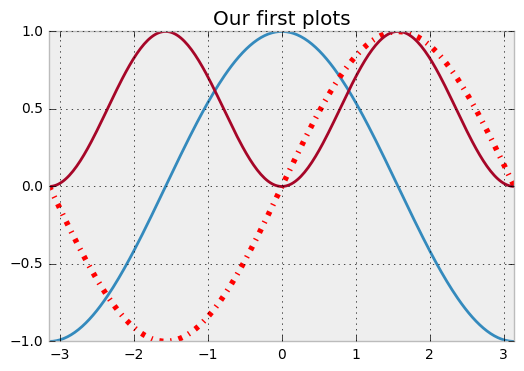

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('bmh')

x = np.linspace(-np.pi, np.pi, 256)
cosx, sinx = np.cos(x), np.sin(x)

plt.plot(x, cosx)
plt.plot(x, sinx, color='red', linewidth=4, linestyle='-.')
plt.plot(x, sinx**2)
plt.xlim(-np.pi, np.pi)
plt.title('Our first plots')

> Note that the `plt.style.use('bmh')` command is not necessary, but it
> does make nicer looking plots in general.  You can use `ggplot`
> instead of `bmh` if you want something resembling plots made by R.
> For a list of options run: `print(plt.style.available)`

You can also save the objects and interrogate/set their properties, as
well as those for the general axes:

#348ABD


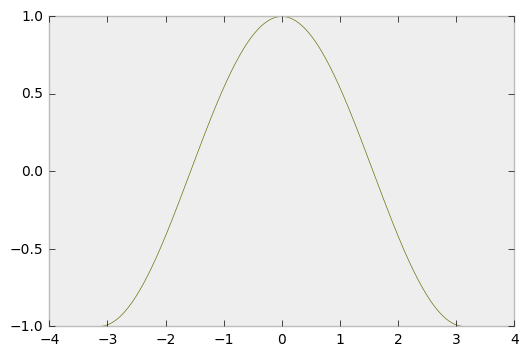

In [39]:
hdl = plt.plot(x, cosx)
print(hdl[0].get_color())
hdl[0].set_color('#707010')
hdl[0].set_linewidth(0.5)
plt.grid('off')

Use `dir()` or `help()` or the online docs to get more info on what
you can do with these.

<a class="anchor" id="histograms"></a>
### Histograms and bar charts

For a simple histogram you can do this:

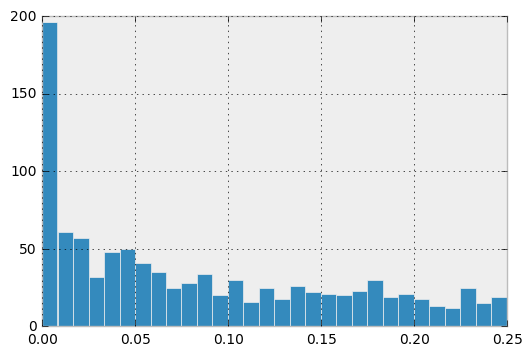

In [40]:
r = np.random.rand(1000)
n,bins,_ = plt.hist((r-0.5)**2, bins=30)

where it also returns the number of elements in each bin, as `n`, and
the bin centres, as `bins`.

> The `_` in the third part on the left
> hand side is a shorthand for just throwing away the corresponding part
> of the return structure.


There is also a call for doing bar plots:

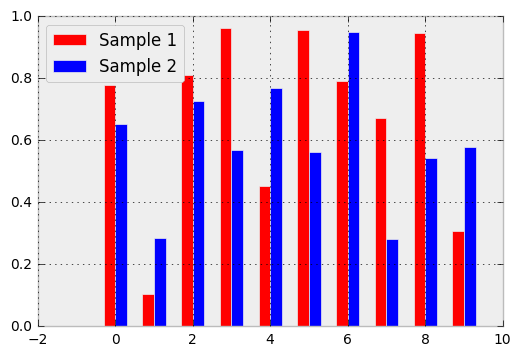

In [41]:
samp1 = r[0:10]
samp2 = r[10:20]
bwidth = 0.3
xcoord = np.arange(10)
plt.bar(xcoord-bwidth, samp1, width=bwidth, color='red', label='Sample 1')
plt.bar(xcoord, samp2, width=bwidth, color='blue', label='Sample 2')
plt.legend(loc='upper left')

<a class="anchor" id="scatter-plots"></a>
### Scatter plots

It would be possible to use `plot()` to create a scatter plot, but
there is also an alternative: `scatter()`

(0.1039996137295216, 0.96287533552434978)

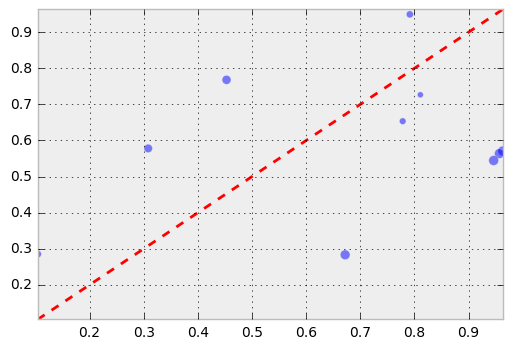

In [42]:
fig, ax = plt.subplots()
# setup some sizes for each point (arbitrarily example here)
ssize = 100*abs(samp1-samp2) + 10 
ax.scatter(samp1, samp2, s=ssize, alpha=0.5)
# now add the y=x line
allsamps = np.hstack((samp1,samp2))
ax.plot([min(allsamps),max(allsamps)],[min(allsamps),max(allsamps)], color='red', linestyle='--')
plt.xlim(min(allsamps),max(allsamps))
plt.ylim(min(allsamps),max(allsamps))

> Note that in this case we use the first line return to get a handle to
> the axis, `ax`, and the figure ,`fig`. The axis can be used instead of
> `plt` in most cases, although the `xlim()` and `ylim()` calls can only
> be done through `plt`.

> In general, figures and subplots can be created in matplotlib in a
> similar fashion to matlab, but they do not have to be explicitly
> invoked as you can see from the earlier examples.

<a class="anchor" id="subplots"></a>
### Subplots

These are very similar to matlab:

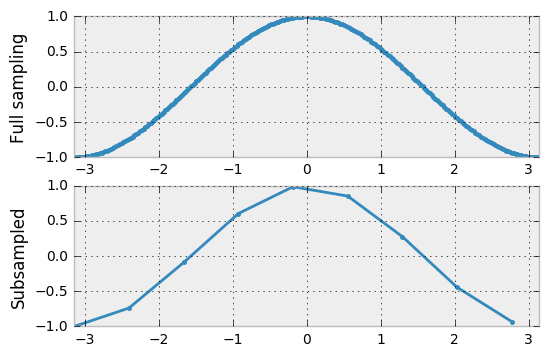

In [43]:
plt.subplot(2, 1, 1)
plt.plot(x,cosx, '.-')
plt.xlim(-np.pi, np.pi)
plt.ylabel('Full sampling')
plt.subplot(2, 1, 2)
plt.plot(x[::30], cosx[::30], '.-')
plt.xlim(-np.pi, np.pi)
plt.ylabel('Subsampled')

<a class="anchor" id="displaying-images"></a>
### Displaying images

The main command for displaying images is `imshow()`

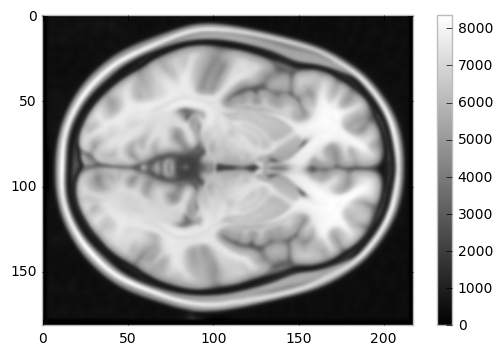

In [44]:
import nibabel as nib
import os.path as op
nim = nib.load(op.expandvars('${FSLDIR}/data/standard/MNI152_T1_1mm.nii.gz'), mmap=False)
imdat = nim.get_data().astype(float)
plt.imshow(imdat[:,:,70], cmap=plt.cm.gray)
plt.colorbar()
plt.grid('off')

<a class="anchor" id="3D-plots"></a>
### 3D plots

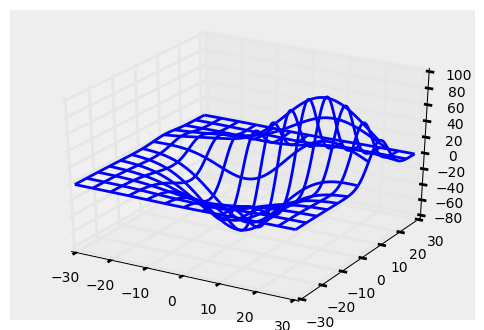

In [45]:
# Taken from https://matplotlib.org/gallery/mplot3d/wire3d.html#sphx-glr-gallery-mplot3d-wire3d-py

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

Surface renderings are many other plots are possible - see 3D examples on
the [matplotlib webpage](https://matplotlib.org/gallery/index.html#mplot3d-examples-index)

---

<a class="anchor" id="plotting-in-scripts"></a>
## Plotting from standalone scripts

When running from a standalone script, the same `matplotlib` import is required,
but the line `%matplotlib <backend>` should *not* be used.

In a script it is also necessary to  _finish_ with `plt.show()` as
otherwise nothing is actually displayed.  For example, the above
examples would setup a plot but the actual graphic would only appear
after the `plt.show()` command was executed.  Furthermore, control is
not returned to the script immediately as the plot is interactive by default.

---

<a class="anchor" id="exercise"></a>
## Exercise

Find a different type of plot (e.g., boxplot, violin plot, quiver
plot, pie chart, etc.), look up
the documentation and then write _your own code that calls this_ to create a plot
from some data that you create yourself (i.e., don't just blindly copy
example code from the docs).

In [46]:
# Make up some data and do the funky plot